In [1]:
    import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline


In [2]:
Calendar = pd.read_csv("D:/project/Github/DM-Project/calendar.csv")
listings_df = pd.read_csv('D:/project/Github/DM-Project/listings.csv')
reviews_df = pd.read_csv('D:/project/Github/DM-Project/reviews.csv')


In [3]:
Calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
#Show the information of the data
Calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [5]:
#describe the count of the data 
Calendar.describe(include='object')

,date,available,price
count,1308890,1308890,643037
unique,365,2,1246
top,2017-09-05,f,$150.00
freq,3586,665853,20752


In [6]:
#Drop the duplicate values
Calendar.drop_duplicates()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


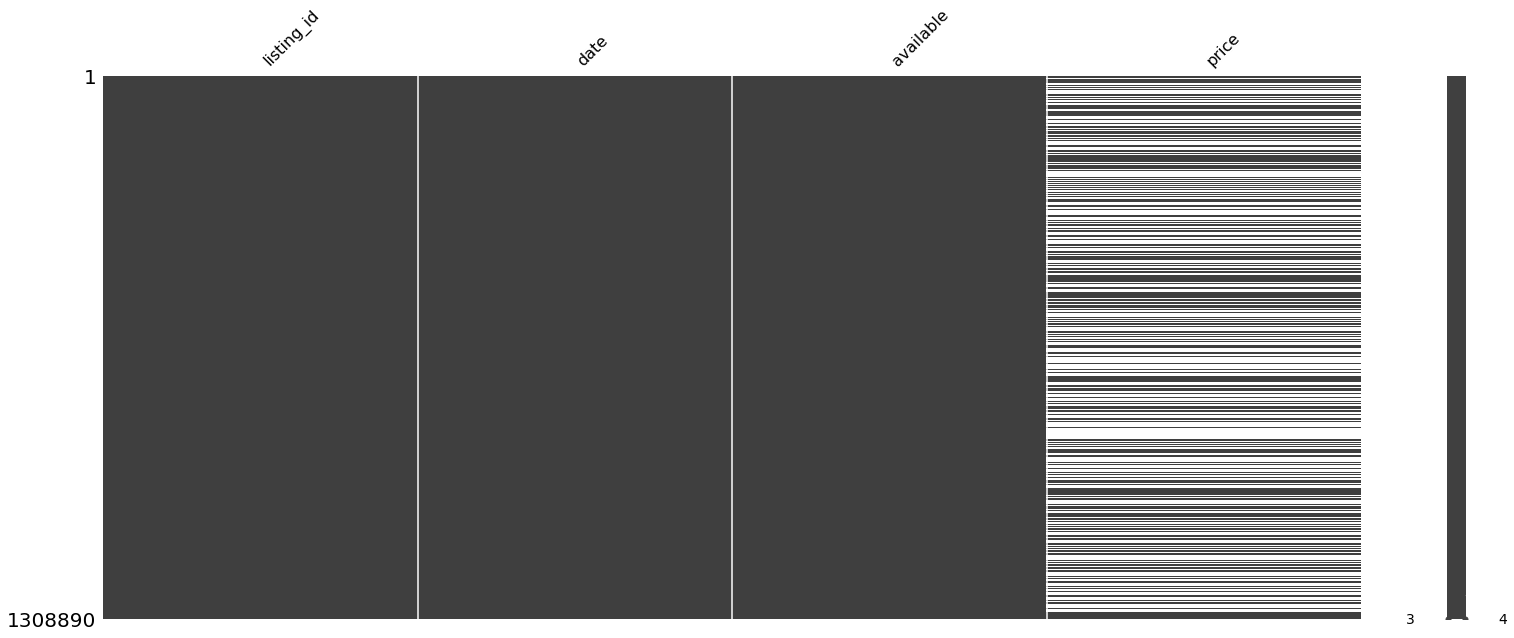

In [7]:
#Visualization of the null value in calendar.csv
import missingno as msno

msno.matrix(Calendar);

In [8]:
#Drop the null value rows
Calendar.dropna(subset=['price'], inplace=True)

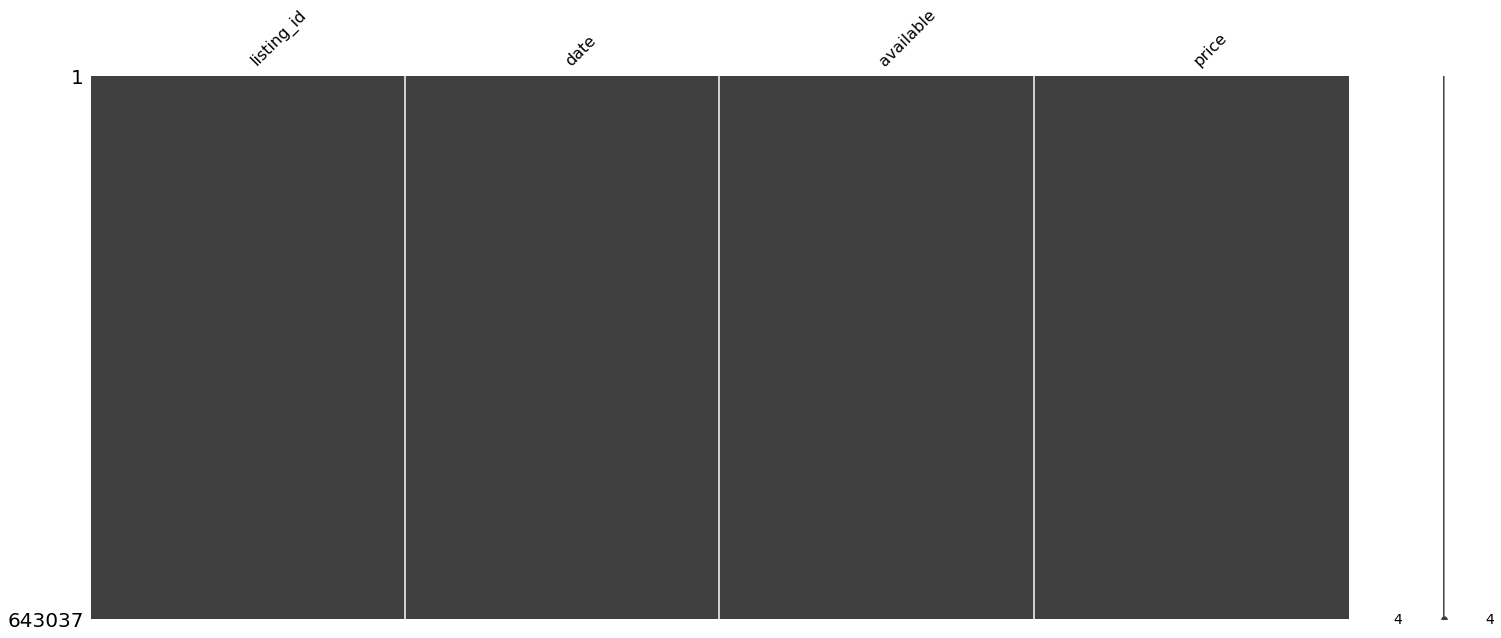

In [9]:
#Visualization of the null value in calendar.csv
msno.matrix(Calendar);

In [10]:
# convert string type into number type for price and remove $ sign
import re
Calendar.price = Calendar.price.apply(
    lambda value: re.sub(r'\$|,', '', value)
).astype(float)

In [11]:
#Show the information of the data
Calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   listing_id  643037 non-null  int64  
 1   date        643037 non-null  object 
 2   available   643037 non-null  object 
 3   price       643037 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 24.5+ MB


In [12]:
# Extract month and year from date string and rewrite values

Calendar['date'] = pd.to_datetime(Calendar.date)
    
month = Calendar['date'].dt.month
month = month.replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'Septempber', 10:'October', 11:'November', 12:'December'})
 
year =Calendar['date'].dt.year
    
Calendar['Month'] = month
Calendar['Year'] = year

In [13]:
#Show 10 lines of Calendar
Calendar.sample(10)

,listing_id,date,available,price,Month,Year
729501,7996844,2017-07-28,t,260.0,July,2017
928059,12856007,2016-12-12,t,55.0,December,2016
1176428,13671334,2017-08-03,t,150.0,August,2017
525689,14636981,2017-04-23,t,80.0,April,2017
560178,7881551,2017-06-29,t,210.0,June,2017
542766,6213822,2017-05-16,t,422.0,May,2017
35075,4767023,2017-07-06,t,205.0,July,2017
676157,2823378,2017-08-14,t,100.0,August,2017
1120389,9218362,2017-01-29,t,167.0,January,2017
649930,7053454,2016-12-27,t,200.0,December,2016


In [14]:
# convert string date to datetime object
Calendar.date = pd.to_datetime(Calendar.date)

In [15]:
# Convert boolean t/f columns to 1/0 columns
boolean_columns = ['available']
for column in boolean_columns:
    Calendar[column] =  Calendar[column].apply(lambda val: True if val=='t' else False)

In [16]:
#Show 10 lines of Calendar
Calendar.sample(10)

,listing_id,date,available,price,Month,Year
792698,14420163,2017-07-22,True,477.0,July,2017
232756,14204600,2016-12-28,True,225.0,December,2016
1192853,5999291,2017-08-03,True,150.0,August,2017
1036359,13007181,2017-04-29,True,115.0,April,2017
603292,611081,2017-08-10,True,175.0,August,2017
871142,7869368,2016-12-27,True,457.0,December,2016
253823,12425501,2016-10-04,True,299.0,October,2016
628034,44205,2016-11-25,True,235.0,November,2016
728304,3377100,2017-03-30,True,245.0,March,2017
159668,1471308,2017-02-04,True,90.0,February,2017


In [17]:
#Show the information of the data
Calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  643037 non-null  int64         
 1   date        643037 non-null  datetime64[ns]
 2   available   643037 non-null  bool          
 3   price       643037 non-null  float64       
 4   Month       643037 non-null  object        
 5   Year        643037 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 30.0+ MB


In [18]:
listings_df.shape

(3585, 95)

In [19]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [20]:
reviews_df.shape

(68275, 6)

In [21]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [22]:
# listings_csv.dtypes
listings_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [23]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [24]:
reviews_df.set_index('id', inplace=True)

In [25]:
# convert string date to datetime object in reviews set
reviews_df.date = pd.to_datetime(reviews_df.date)

In [26]:
# test
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68275 entries, 4724140 to 98550693
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     68275 non-null  int64         
 1   date           68275 non-null  datetime64[ns]
 2   reviewer_id    68275 non-null  int64         
 3   reviewer_name  68275 non-null  object        
 4   comments       68222 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.1+ MB


In [27]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [28]:
listings_df.set_index('id', inplace=True)

In [29]:
listings_df.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [30]:
# convert string dates to datetime objects
listings_df.last_scraped = pd.to_datetime(listings_df.last_scraped)

In [31]:
# convert price column to float type after stripping dollar, comma character
listings_df.price = listings_df.price.str.lstrip('$').str.replace(',', '').astype('float')

In [32]:
# drop columns with no recordings

listings_df.drop(['neighbourhood_group_cleansed', 'jurisdiction_names', 'license', 'has_availability'],
                 axis=1, inplace=True)

In [33]:
# drop rows with price <= 0, bathrooms < 1, bedrooms <=0, accommodates <= 0

listings_df = listings_df[listings_df.price > 0]
listings_df = listings_df[listings_df.bathrooms >= 1]
listings_df = listings_df[listings_df.bedrooms > 0]
listings_df = listings_df[listings_df.accommodates > 0]

In [34]:
# replace float values to lower value in bathroom column

listings_df['bathrooms'] = listings_df.bathrooms.replace(1.5, 1)
listings_df['bathrooms'] = listings_df.bathrooms.replace(2.5, 2)
listings_df['bathrooms'] = listings_df.bathrooms.replace(3.5, 3)
listings_df['bathrooms'] = listings_df.bathrooms.replace(4.5, 4)

In [35]:
# convert bedrooms, bathrooms, accommodates count to int from float
listings_df.bedrooms = listings_df.bedrooms.astype('int')
listings_df.bathrooms = listings_df.bathrooms.astype('int')
listings_df.accommodates = listings_df.accommodates.astype('int')

In [36]:
# clean city column

listings_df.city.unique()

array(['Boston', 'Roslindale', 'Roslindale, Boston', 'Jamaica Plain',
       'Brookline', 'Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
       'Roxbury Crossing', 'Jamaica Plain ', 'Jamaica Plain, MA',
       'Boston (Jamaica Plain)', 'Jamaica plain ', 'ROXBURY CROSSING',
       'Mission Hill, Boston', 'boston', '波士顿',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'east Boston ', 'Charlestown',
       'Boston (Charlestown)', 'Somerville', 'Brighton', 'Brighton ',
       'Boston ', nan, 'West Roxbury', 'Newton', 'Hyde Park', 'Mattapan',
       'Milton', 'Dorchester', 'dorchester, boston ', 'South Boston',
       'Allston', 'ALLSTON'], dtype=object)

In [37]:
listings_df[listings_df.city=='波士顿']

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
4625517,https://www.airbnb.com/rooms/4625517,20160906204935,2016-09-07,GreenT&bus stops in front of door,Super convenient :30 seconds walk to Green T a...,"Awesome area of Brookline&Boston, one block fr...",Super convenient :30 seconds walk to Green T a...,none,Connivence to almost everywhere- penguins piz...,"If you are a student, I may give you 5% off.If...",...,NaN,NaN,NaN,f,f,strict,f,f,1,NaN


In [38]:
# drop row with unusual city name since there is only with observation associated with it

listings_df.drop(index=4625517, inplace=True)
listings_df.shape

(3254, 90)

In [39]:
listings_df['city_cleansed'] = listings_df.city.copy()

In [40]:
# replace all duplicate entries

listings_df['city_cleansed'] = listings_df.city_cleansed.replace('ALLSTON', 'Allston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Roslindale, Boston', 'Roslindale')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('dorchester, boston ', 'Dorchester')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace(['Boston ', 'boston'], 'Boston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('east Boston ', 'East Boston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Boston (Charlestown)', 'Charlestown')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('ROXBURY CROSSING', 'Roxbury Crossing')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Brighton ', 'Brighton')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace(
    ['Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
     'Jamaica Plain ', 'Jamaica plain ', 'Boston (Jamaica Plain)',], 'Jamaica Plain')

In [41]:
listings_df.city_cleansed.unique()

array(['Boston', 'Roslindale', 'Jamaica Plain', 'Brookline',
       'Roxbury Crossing', 'Jamaica Plain, MA', 'Mission Hill, Boston',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'Charlestown', 'Somerville', 'Brighton', nan,
       'West Roxbury', 'Newton', 'Hyde Park', 'Mattapan', 'Milton',
       'Dorchester', 'South Boston', 'Allston'], dtype=object)

In [42]:
listings_df.fillna(0, inplace=True)

In [43]:
# test
listings_df.shape

(3254, 91)

In [60]:
#Show the availability of each month in Boston
new = Calendar.groupby(['Month']).count()[['listing_id']].sort_values(by = 'listing_id', ascending = False)
new

,listing_id
Month,
1,63181
12,60997
11,58888
2,56810
8,55561
3,55181
7,54963
5,53600
6,52731


Text(0, 0.5, 'availability rate')

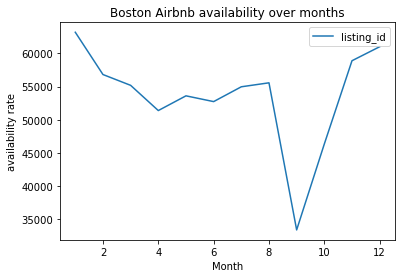

In [62]:
#Visualization the availability of each month in Boston
calendardf_copy=Calendar.copy()
Calmonth = Calendar['date'].dt.month
ax1 = calendardf_copy.groupby(['Month']).count()[["listing_id"]].plot(title='Boston Airbnb availability over months')
ax1.set_ylabel("availability")

In [63]:
features_df = listings_df.copy()
neighbour_count = features_df.neighbourhood.value_counts()

In [64]:
neighbour_count

0                     512
Allston-Brighton      336
Jamaica Plain         306
Back Bay              232
South End             232
Fenway/Kenmore        220
South Boston          208
Dorchester            191
Beacon Hill           134
North End             117
East Boston           112
Roxbury               105
Mission Hill           99
Charlestown            74
Chinatown              74
West End               66
Roslindale             45
West Roxbury           34
Theater District       26
Hyde Park              24
Downtown Crossing      23
Mattapan               20
Financial District     13
Somerville             13
Brookline               8
Downtown                7
Leather District        7
Cambridge               7
Chestnut Hill           4
Government Center       3
Harvard Square          2
Name: neighbourhood, dtype: int64

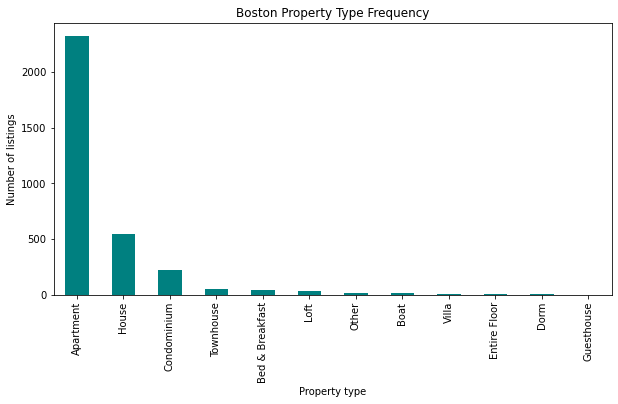

In [65]:
# clean property type column
features_df.property_type.unique()
features_df = features_df[features_df.property_type != 0]
# number of listings based on the property type
property_type_count = features_df.property_type.value_counts()
property_type_count
property_type_count.plot.bar(color = 'teal', figsize =(10,5), title = 'Boston Property Type Frequency')
plt.xlabel('Property type');
plt.ylabel('Number of listings');

In [69]:
prices_data = features_df.groupby(['property_type','neighbourhood']).price.mean()
prices_data

property_type  neighbourhood     
Apartment      0                     157.765464
               Allston-Brighton      119.628959
               Back Bay              265.336735
               Beacon Hill           214.869565
               Brookline             131.333333
                                        ...    
Townhouse      South End             276.000000
Villa          Allston-Brighton       70.000000
               Downtown              287.000000
               Financial District    246.666667
               Roslindale             40.000000
Name: price, Length: 134, dtype: float64

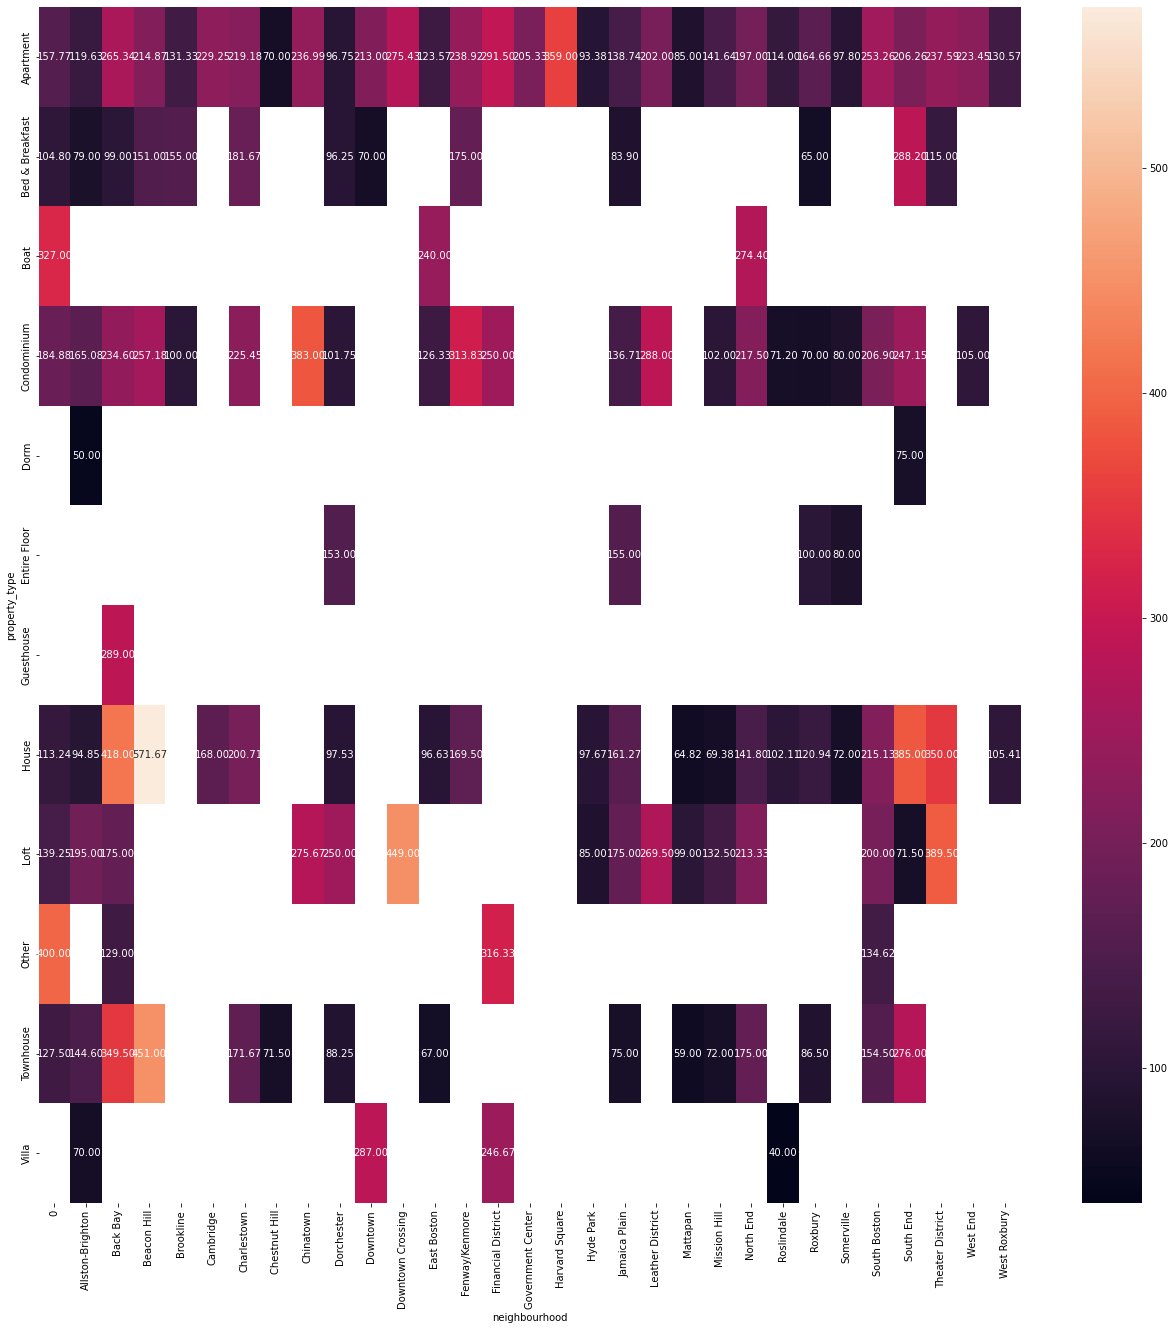

In [74]:
plt.figure(figsize=(22,22));
sns.heatmap(features_df.groupby(['property_type', 'neighbourhood']).price.mean().unstack(),annot=True, fmt=".2f");